In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import re
from liftover import get_lifter
import seaborn as sns
import networkx as nx
import pickle
sys.path.append("/n/holystore01/LABS/liau_lab/Users/heejinroh/Yan_minimap/code/100224")
#sys.path.append("/n/holShgmlystore01/LABS/liau_lab/Users/heejinroh/Yan_minimap/tdac-seq/tdac_seq")
#from ddda_dataset_dedup_2 import *
from ddda_dataset import *
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec

In [2]:
# Create a folder to save plots
working_dir = "/n/holystore01/LABS/liau_lab/Users/heejinroh/Yan_minimap/analysis/HJR234_6"
plot_dir = os.path.join("/n/holystore01/LABS/liau_lab/Users/heejinroh/Yan_minimap/analysis/HJR234_6/", "plot")
os.system("mkdir -p " + plot_dir)

# Create a dictionary for reference regions
ref_range_dict = {
    'HBB': ('chr11', 5223731, 5235754)
}

# Initialize ddda_dataset
ddda_data = ddda_dataset(
    ID = "HJR234_6",
    region_dict = ref_range_dict, 
    genome_file = "/n/holystore01/LABS/liau_lab/Users/heejinroh/Genome/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna", 
    fastq_file =  "/n/holystore01/LABS/liau_lab/Users/heejinroh/HJR234_nanopore/HJR234_6/HJR234_6.fastq.gz", 
    working_dir =  "/n/holystore01/LABS/liau_lab/Users/heejinroh/Yan_minimap/analysis/HJR234"
)

# Load DddA bias model
with open("/n/holystore01/LABS/liau_lab/Users/heejinroh/Yan_minimap/code/bias_dict.pkl", "rb") as f:
    ddda_data.bias_model = pickle.load(f)



Loading reference genome
Extracting sequences for each locus


In [3]:
from matplotlib.colors import ListedColormap, BoundaryNorm
base_colors_blue = plt.cm.Blues(np.linspace(0, 1, 256))
base_colors_blue[0] = [1,1,1, 1]  # 첫 번째 색상을 밝은 회색으로 변경
base_colors_blue[-1] = [0, 0, 0.5, 1]  # 마지막 색상을 더 어두운 파란색으로 변경
custom_cmap_blue = ListedColormap(base_colors_blue)

base_colors_red = plt.cm.Reds(np.linspace(0, 1, 256))
base_colors_red[0] = [1,1,1, 1]  # 첫 번째 색상을 밝은 회색으로 변경
base_colors_red[-1] = [0.5, 0, 0, 1]  # 마지막 색상을 더 어두운 빨간색으로 변경
custom_cmap_red = ListedColormap(base_colors_red)

base_colors_purple = plt.cm.Purples(np.linspace(0, 1, 256))
base_colors_purple[0] = [1,1,1, 1]  # Change the first color to light gray
base_colors_purple[-1] = [0.25, 0, 0.5, 1]  # Change the last color to a darker purple
custom_cmap_purple = ListedColormap(base_colors_purple)

In [4]:
with open('/n/holystore01/LABS/liau_lab/Users/heejinroh/Yan_minimap/analysis/HJR234/track_undeleted_ac_HJR234_2.pkl', 'rb') as f:
    track_undeleted_ac_2 = pickle.load(f)

with open('/n/holystore01/LABS/liau_lab/Users/heejinroh/Yan_minimap/analysis/HJR234/track_undeleted_ac_HJR234_4.pkl', 'rb') as f:
    track_undeleted_ac_4 = pickle.load(f)
    
with open('/n/holystore01/LABS/liau_lab/Users/heejinroh/Yan_minimap/analysis/HJR234/track_undeleted_ac_HJR234_6.pkl', 'rb') as f:
    track_undeleted_ac_6 = pickle.load(f)
    
with open('/n/holystore01/LABS/liau_lab/Users/heejinroh/Yan_minimap/analysis/HJR234/edits_HJR234_2.pkl', 'rb') as f:
    edits_2 = pickle.load(f)
    
with open('/n/holystore01/LABS/liau_lab/Users/heejinroh/Yan_minimap/analysis/HJR234/edits_HJR234_4.pkl', 'rb') as f:
    edits_4 = pickle.load(f)
    
with open('/n/holystore01/LABS/liau_lab/Users/heejinroh/Yan_minimap/analysis/HJR234/edits_HJR234_6.pkl', 'rb') as f:
    edits_6 = pickle.load(f)
    


In [5]:
plot_range = np.arange(500, 5235754-5223731-500)

In [6]:
ymax = max(max(track_undeleted_ac_2),max(track_undeleted_ac_4),max(track_undeleted_ac_6))

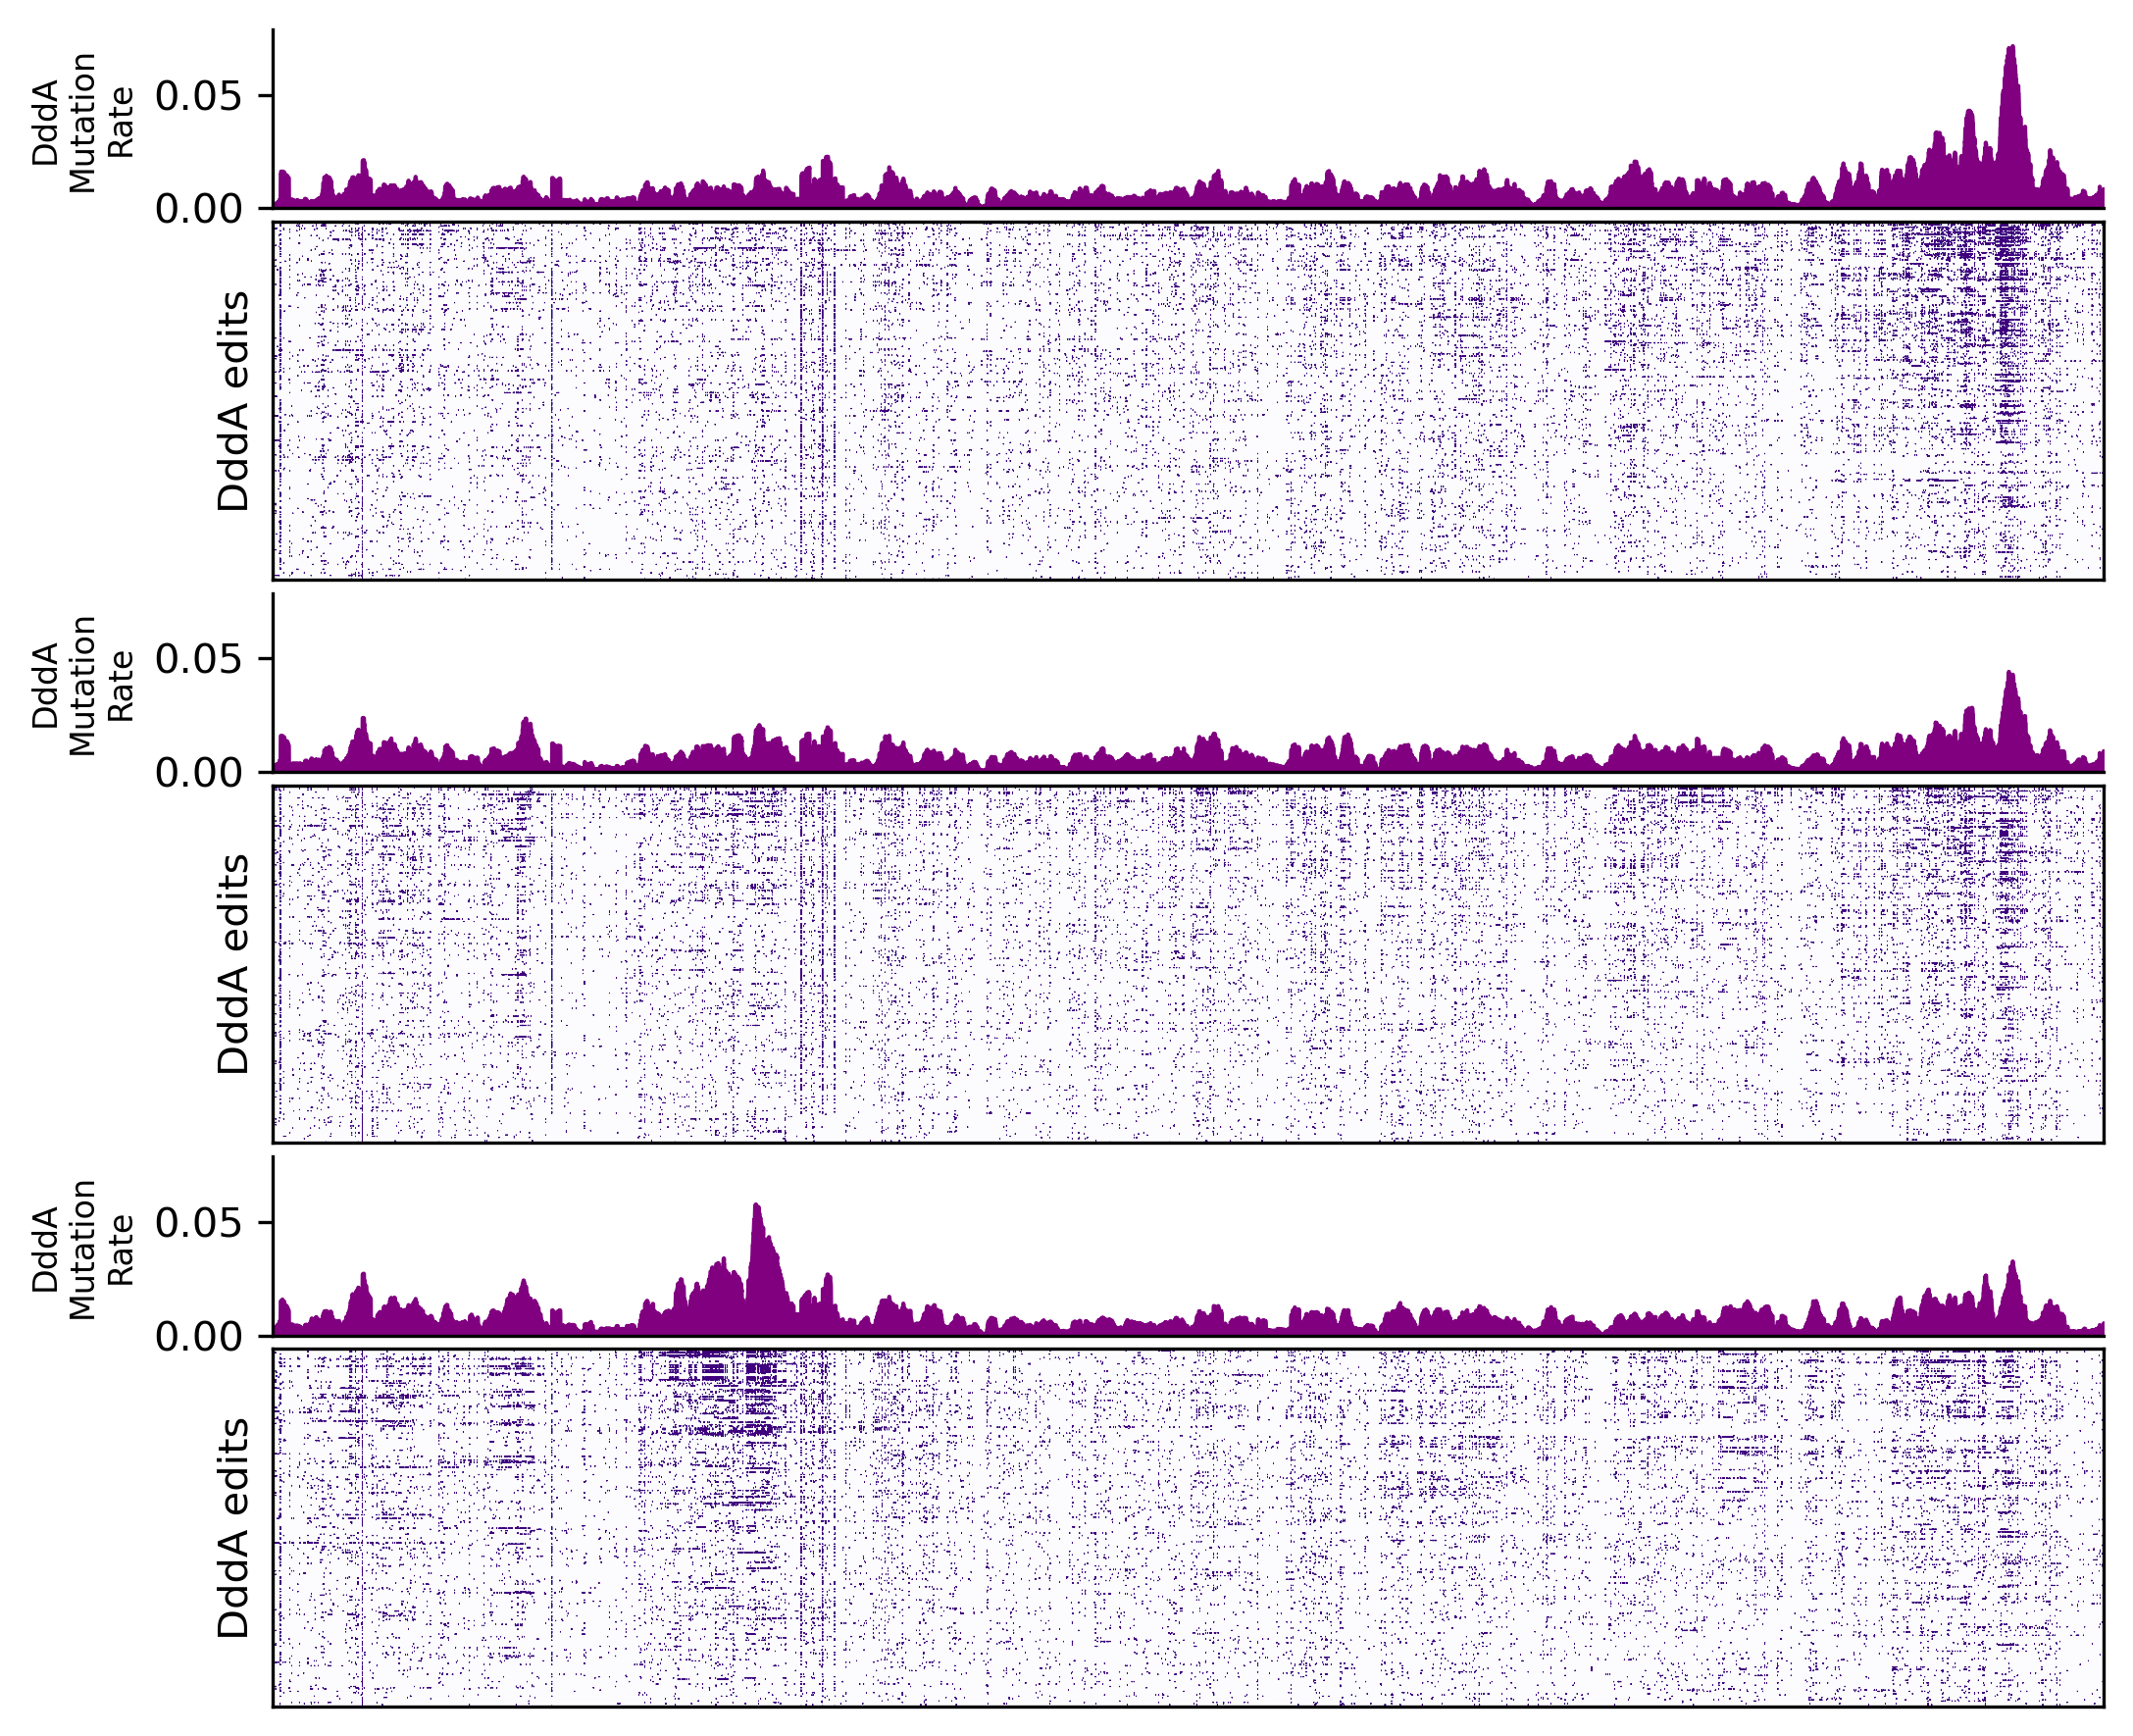

In [13]:
import matplotlib.gridspec as gridspec
import matplotlib.colorbar as cbar
from matplotlib.colors import LinearSegmentedColormap
dark_grey_cmap = LinearSegmentedColormap.from_list('dark_greys', ['#ffffff','#333333'])
brown_cmap = LinearSegmentedColormap.from_list('darker_brown', ['#FFFFFF', '#8B4513', '#4B2E0E'])

fig = plt.figure(dpi=300,figsize=(8,6 ))  # Adjusted the figure size to accommodate four plots
gs = gridspec.GridSpec(6, 1, height_ratios=[0.5, 1, 0.5, 1, 0.5, 1])  # Adjusted to four rows


# First subplot (now second)
ax3 = plt.subplot(gs[0])
x_values = np.arange(len(track_undeleted_ac_2))
ax3.fill_between(x_values, track_undeleted_ac_2, color='purple', alpha=1)
ax3.set_xlim([x_values.min(), x_values.max()])
ax3.set_ylim([0, ymax * 1.1])
ax3.set_xticks([])  # Remove x-axis ticks
ax3.set_xlabel('')
ax3.set_ylabel('DddA\nMutation\nRate', fontsize=8)

# Remove box outline and keep x and y axis
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)



# Second subplot (now third)
ax4 = plt.subplot(gs[1])
ax4.imshow(edits_2[:, plot_range], aspect='auto', vmax=0.05, vmin=0, cmap='Purples')
ax4.set_ylabel('DddA edits')
ax4.set_xticks([])  # Remove x-axis ticks
ax4.set_yticks([])  # Remove y-axis ticks
ax4.set_xlabel('')

# First subplot (now second)
ax3 = plt.subplot(gs[2])
x_values = np.arange(len(track_undeleted_ac_4))
ax3.fill_between(x_values, track_undeleted_ac_4, color='purple', alpha=1)
ax3.set_xlim([x_values.min(), x_values.max()])
ax3.set_ylim([0, ymax * 1.1])
ax3.set_xticks([])  # Remove x-axis ticks
ax3.set_xlabel('')
ax3.set_ylabel('DddA\nMutation\nRate', fontsize=8)

# Remove box outline and keep x and y axis
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)



# Second subplot (now third)
ax4 = plt.subplot(gs[3])
ax4.imshow(edits_4[:, plot_range], aspect='auto', vmax=0.05, vmin=0, cmap='Purples')
ax4.set_ylabel('DddA edits')
ax4.set_xticks([])  # Remove x-axis ticks
ax4.set_yticks([])  # Remove y-axis ticks
ax4.set_xlabel('')

# First subplot (now second)
ax3 = plt.subplot(gs[4])
x_values = np.arange(len(track_undeleted_ac_6))
ax3.fill_between(x_values, track_undeleted_ac_6, color='purple', alpha=1)
ax3.set_xlim([x_values.min(), x_values.max()])
ax3.set_ylim([0, ymax * 1.1])
ax3.set_xticks([])  # Remove x-axis ticks
ax3.set_xlabel('')
ax3.set_ylabel('DddA\nMutation\nRate', fontsize=8)

# Remove box outline and keep x and y axis
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)



# Second subplot (now third)
ax4 = plt.subplot(gs[5])
ax4.imshow(edits_6[:, plot_range], aspect='auto', vmax=0.05, vmin=0, cmap='Purples')
ax4.set_ylabel('DddA edits')
ax4.set_xticks([])  # Remove x-axis ticks
ax4.set_yticks([])  # Remove y-axis ticks
ax4.set_xlabel('')


plt.tight_layout()  # Adjust layout
plt.subplots_adjust(hspace=0.05, right=0.9)  # Adjust space between plots and leave room for colorbar

plt.savefig('/n/holystore01/LABS/liau_lab/Users/heejinroh/Yan_minimap/analysis/HJR234/HJR234_accessibility_max0.05.pdf', format='pdf')

plt.show()